In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns; sns.set()
from sklearn import datasets #en caso de no usar estos datos usariamos pandas para importar datos de .cvs .sql .xlsx o de la red
#Lo que haremos ahora es crear una variable donde almacenar los datos

In [2]:
cancer=datasets.load_breast_cancer() #wueneo acá lo que tenemo es datasets es el comando donde estan almacenados los datos dentro de sklearn .load_ es para cargar el data y luego viene el nombre de la base de datos
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [4]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

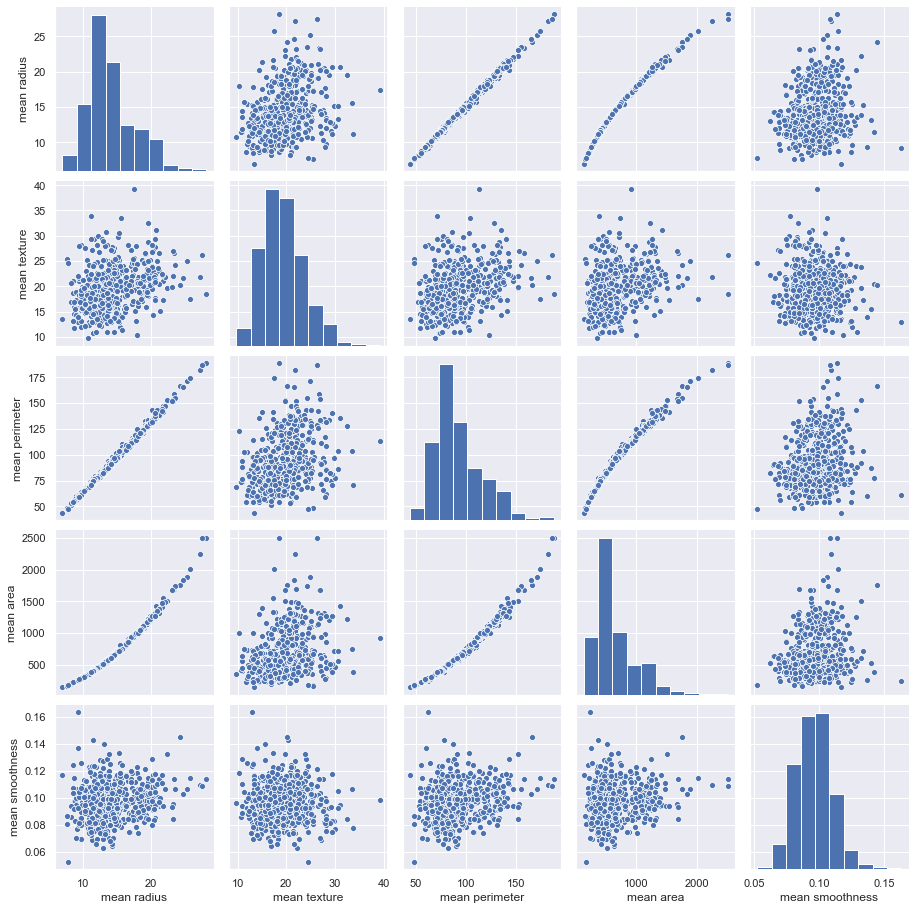

In [5]:
sns.pairplot(df, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] ) #SNS es como una especie de matplolip, acá lo que haremos es ver la relacion entre nuestras variable

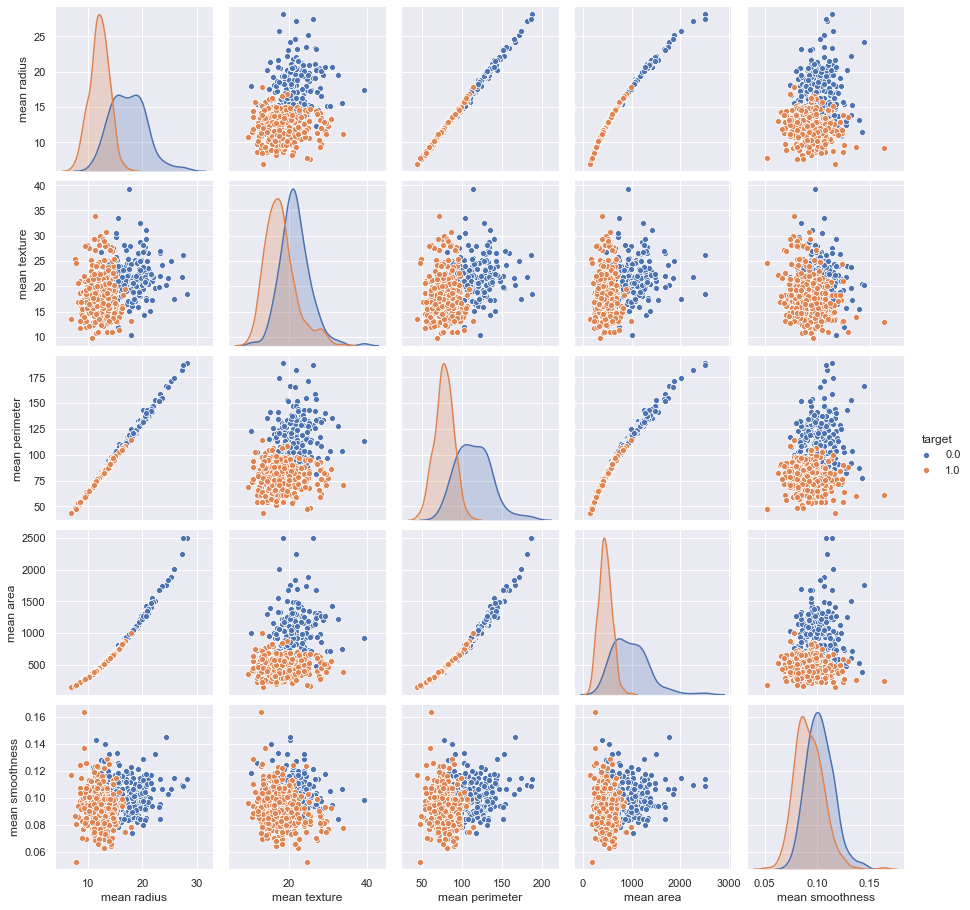

In [6]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] ) #SNS es como una especie de matplolip, acá lo que haremos es ver la relacion entre nuestras variable
#naranja benigno, azul maligno

In [7]:
cancer.feature_names #estamos viendo las etiquetas
cancer.target_names #aca estamos viendo las carascteristicas, maligno ó benigno
cancer.data.shape #estamos viendo cuantas columnas y filas tiene el dataset

(569, 30)

In [8]:
df['target'].value_counts() #vemos cuantos datos hay de cada variable 1.0 benigno 0 maligno 

1.0    357
0.0    212
Name: target, dtype: int64

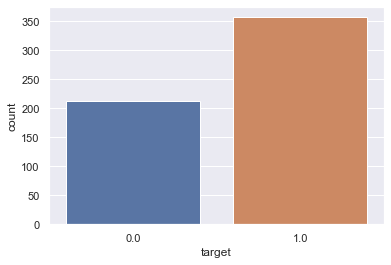

In [9]:
sns.countplot(df['target'], label = "Count") #graficamos los datos, la distribucion

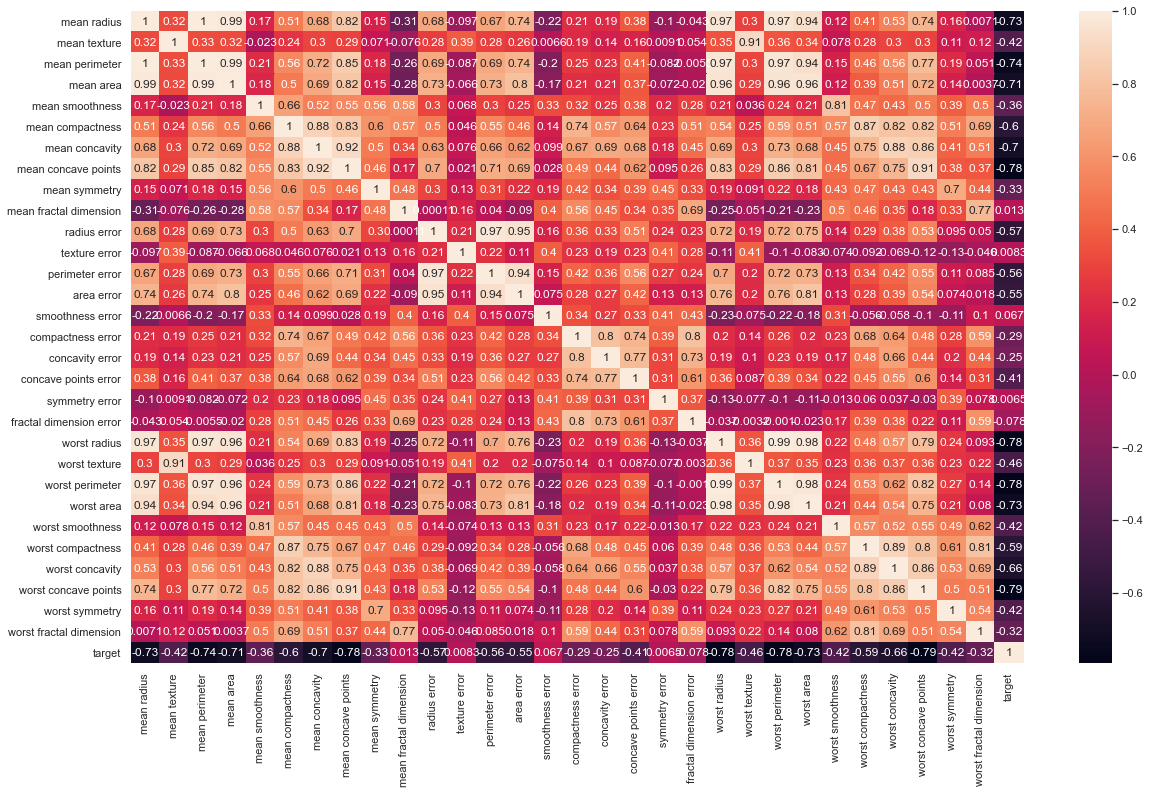

In [10]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(), annot=True) #hacemos la matriz de correlacion
##Hasta acá va el procesamiento de datos###

In [11]:
#Como nos dimos cuenta los datos tienen unas caracteristicas unicas,vemos que son datos que nos hablan de cancer, entonces lo que queremos hacer es saber la probabilidad que una persona con un tumor tenga o no cancer
#vamos a armar el modelo o bueno aun no armaremos el modelo como tal, pero si vamoa a definir las variables, para luego entrenarlo
x = cancer.data
x
#Para y utilizaremos los datos de las etiquetas
y= cancer.target
# 1 el tumor es maligno 0el tumor es benigno
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(n_estimators=50, criterion = "entropy") #por defecto el criterio de criterio viene definido con GINI, acá lo vamos a cambiar por entropy, n_stimator es el numero de arboles que queremos que tenga nuestro modelo
#entrenamos el modelo 


In [19]:
bosque.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [20]:
y_pred = bosque.predict(x_test)

In [21]:
y_pred, y_test

(array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1]))

In [23]:
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred, labels=[1,0])
matriz1= pd.DataFrame(matriz, index=['tiene_cancer', 'esta_sano'],
                         columns=['predicted_cancer','predicted_healthy'])
matriz1 #wueno los resultados se interpretan así: en la diagonal principal, son los datos que se han predicho correctamente, en la diagonal secundaria los que presentaron errores, se deben sumar para saber el total


predicted_cancer  predicted_healthy
tiene_cancer                69                  1
esta_sano                    1                 43

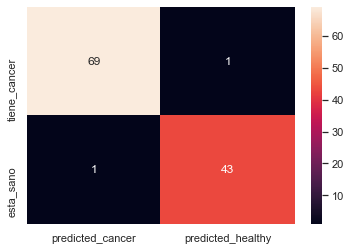

In [24]:
sns.heatmap(matriz1, annot=True)

In [25]:
from sklearn.metrics import precision_score
precision =precision_score(y_test, y_pred)
precision

0.9857142857142858

In [26]:
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
exactitud

0.9824561403508771

In [27]:
from sklearn.metrics import recall_score
sensibilidad= recall_score(y_test, y_pred)
sensibilidad

0.9857142857142858

In [28]:
#calculamos el F1 que es la combinacion de la sensibilidad y la exactitud
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
puntajef1

0.9857142857142858

In [29]:
#calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test, y_pred)
roc_auc #Acá la metrica mas importante o relevante o bueno la que podemos usar es la curva ROC-AUC ó el F1

0.9814935064935065